<a href="https://colab.research.google.com/github/rename2222/-repo-exercise/blob/main/Copy_of_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


!mkdir -p ~/.kaggle
!cp kagglee.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d sujaykapadnis/pomegranate-fruit-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/pomegranate-fruit-diseases-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 4.18G/4.18G [01:56<00:00, 41.2MB/s]
100% 4.18G/4.18G [01:56<00:00, 38.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pomegranate-fruit-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf # Corrected the typo in the module name from 'tenserflow' to 'tensorflow'
from tensorflow import keras # Corrected the typo in the module name from 'tenserflow' to 'tensorflow'
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import tensorflow as tf

# Define dataset path (set to the parent directory containing all disease folders)
dataset_path = "/content/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/"

# Load dataset with 80% train and 20% validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',     # Auto-labels from subfolder names
    label_mode='int',      # Integer labels for classification
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=42                # Ensures reproducibility
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,  # 20% validation
    subset="validation",
    seed=42
)


Found 5099 files belonging to 5 classes.
Using 4080 files for training.
Found 5099 files belonging to 5 classes.
Using 1019 files for validation.


In [ ]:
#narmalize

def process (image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#S cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,714,625 (14.17 MB)

 Trainable params: 3,714,433 (14.17 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.2293 - loss: -81790.7188 - val_accuracy: 0.2345 - val_loss: -45655.0117
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.2309 - loss: -4634022.5000 - val_accuracy: 0.2228 - val_loss: -4133457.5000
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.2317 - loss: -42985776.0000 - val_accuracy: 0.2237 - val_loss: -48550192.0000
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.2264 - loss: -181619184.0000 - val_accuracy: 0.2237 - val_loss: -219848160.0000
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.2282 - loss: -517233536.0000 - val_accuracy: 0.2228 - val_loss: -584548672.0000
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.2262 - loss: -1181746176.0000 - val_accuracy: 0.2228 - val_loss: -1768894592.0000
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.2290 - loss: -2300718080.0000 - val_accuracy: 0.2228 - val_loss

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

NameError: name 'history' is not defined

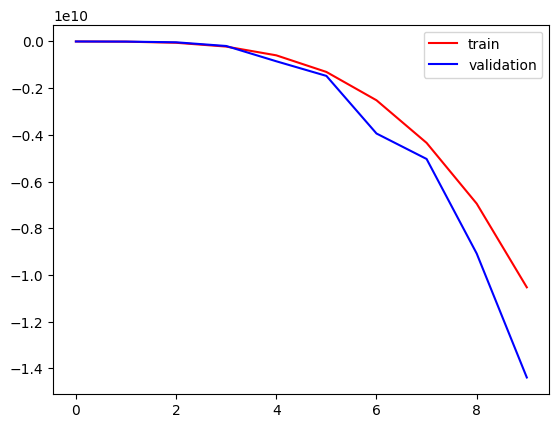

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#way to reduce overfitting
#add more data
#data augmentation
#L1/L2 regularizers
#Dropout
#BatchNorm
#Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.webp') # Added quotes around 'content/cat.webp' and corrected the path.

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
import cv2

test_img = cv2.imread('/content/cat.webp')
# Resize the image to (256, 256)
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1,256,256,1))
model.predict(test_input)